In [259]:
print('This project attempts to analyze trends in the stock market, starting with a Monte Carlo Simulation.\
More segments will be added in the future.')

This project attempts to analyze trends in the stock market, starting with a Monte Carlo Simulation.More segments will be added in the future.


In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import random
%matplotlib inline

In [4]:
from datapackage import Package
package = Package('https://datahub.io/core/s-and-p-500-companies-financials/datapackage.json')

for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        fullpackage = pd.DataFrame(resource.read())
        fullpackage.columns = resource.headers

In [5]:
print(fullpackage.head())

  Symbol                 Name                  Sector   Price Price/Earnings  \
0    MMM           3M Company             Industrials  222.89          24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24          27.76   
2    ABT  Abbott Laboratories             Health Care   56.27          22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48          19.41   
4    ACN        Accenture plc  Information Technology  150.51          25.47   

  Dividend Yield Earnings/Share 52 Week Low 52 Week High    Market Cap  \
0      2.3328617           7.92      259.77       175.49  138721055226   
1      1.1479592            1.7       68.39       48.925   10783419933   
2      1.9089824           0.26        64.6        42.28  102121042306   
3      2.4995599           3.29      125.86        60.05  181386347059   
4      1.7144699           5.44       162.6       114.82   98765855553   

        EBITDA Price/Sales Price/Book  \
0   9048000000   4.3902707      1

In [6]:
tickers=fullpackage['Symbol']
print(tickers.head(),tickers.tail())
"""
Ticker symbol for all 505 stocks in the S&P 500
"""

0     MMM
1     AOS
2     ABT
3    ABBV
4     ACN
Name: Symbol, dtype: object 500     XYL
501     YUM
502     ZBH
503    ZION
504     ZTS
Name: Symbol, dtype: object


'\nTicker symbol for all 505 stocks in the S&P 500\n'

In [211]:
print(fullpackage['Sector'].value_counts())
"""The Industry secotr in the S&P 500 and the number of companies in each sector"""

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64


'The Industry secotr in the S&P 500 and the number of companies in each sector'

In [8]:
from pandas_datareader import data, wb
import datetime

import fix_yahoo_finance as yf
yf.pdr_override() 

In [9]:
end = datetime.datetime.today()
start = end - datetime.timedelta(days=1095)
print('Data start date: {}'.format(start))
print('Data end date: {}'.format(end))
print('Stock Market data will be retrieved for the last 3 years starting from ',end )

Data start date: 2016-01-13 17:38:49.165828
Data end date: 2019-01-12 17:38:49.165828
Stock Market data will be retrieved for the last 3 years starting from  2019-01-12 17:38:49.165828


In [368]:
stockdata = pd.DataFrame(data.get_data_yahoo(tickers.tolist(),start,end, as_panel=False,group_by = 'ticker'))

[*********************100%***********************]  505 of 505 downloaded


In [11]:
print(stockdata.head())

                   MMM                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2016-01-13  140.889999  142.190002  138.539993  138.720001  128.589355   
2016-01-14  139.740005  142.440002  138.860001  141.179993  130.869705   
2016-01-15  138.300003  140.100006  137.210007  138.690002  128.561569   
2016-01-19  140.100006  140.800003  137.410004  138.389999  128.283478   
2016-01-20  136.949997  137.750000  134.639999  136.960007  126.957886   

                           AOS                                    ...     \
             Volume       Open       High        Low      Close   ...      
Date                                                              ...      
2016-01-13  2598300  33.330002  33.459999  31.504999  31.620001   ...      
2016-01-14  3720400  31.625000  32.360001  30.809999  32.080002   ...      
2016-01-15  4683500  31.110

In [232]:
print('This is a randomly selected stock within the S&P 500 with today\'s stock quote')
print('Run this cell again to retrieve a new number')
counter = np.random.randint(0,505)
print(fullpackage['Name'][counter])
print(fullpackage['Symbol'][counter])
print(stockdata[fullpackage['Symbol'][counter]].iloc[-1].round())

This is a randomly selected stock within the S&P 500 with today's stock quote
Run this cell again to retrieve a new number
Morgan Stanley
MS
Open              41.0
High              42.0
Low               41.0
Close             42.0
Adj Close         42.0
Volume       8185600.0
Name: 2019-01-11 00:00:00, dtype: float64


In [233]:
logR = np.log(1+stockdata[tickers[counter]]['Adj Close'].pct_change())
print(logR.head(15))

Date
2016-01-13         NaN
2016-01-14    0.009623
2016-01-15   -0.044435
2016-01-19    0.011105
2016-01-20   -0.039617
2016-01-21   -0.018393
2016-01-22    0.032946
2016-01-25   -0.024907
2016-01-26    0.020210
2016-01-27    0.001183
2016-01-28   -0.007915
2016-01-29    0.027818
2016-02-01   -0.006591
2016-02-02   -0.048207
2016-02-03   -0.007374
Name: Adj Close, dtype: float64


This is a chart of the the daily adjusted close of Morgan Stanley


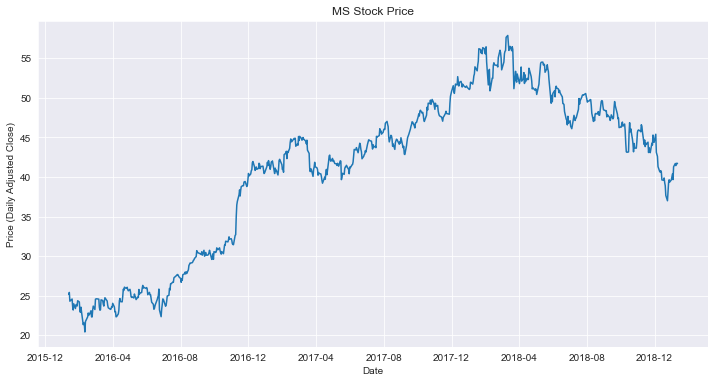

This is a chart of the daily log returns of Morgan Stanley


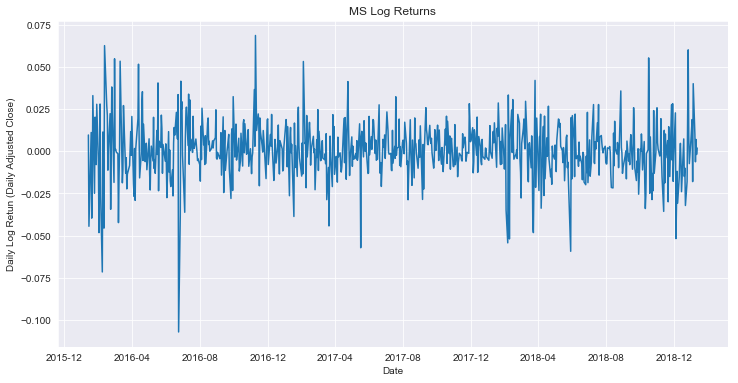

In [234]:
sns.set_style('darkgrid')
plt.figure(figsize=[12,6])
sns.lineplot(data = stockdata[tickers[counter]]['Adj Close'])
plt.title(tickers[counter]+' Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (Daily Adjusted Close)')
print('This is a chart of the the daily adjusted close of {}'.format(fullpackage.Name[counter]))
plt.show()

plt.figure(figsize=[12,6])
sns.lineplot(data = logR)
plt.title(tickers[counter]+' Log Returns')
plt.xlabel('Date')
plt.ylabel('Daily Log Retun (Daily Adjusted Close)')
print('This is a chart of the daily log returns of {}'.format(fullpackage.Name[counter]))
plt.show()

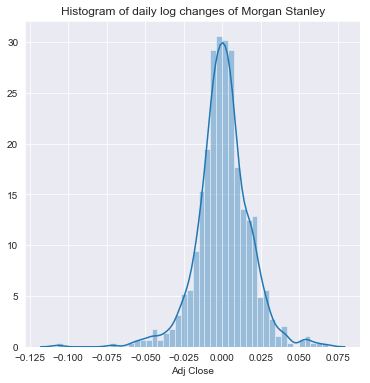

As you can see, the daily percentage change in the returns of a stock is close to being normally      distributed this is a important concept in Monte Carlo simulations as we use the assumptions that      changes in daily returns are normally distributed.


In [235]:
plt.figure(figsize=[6,6])
sns.distplot(logR[1:])
plt.title('Histogram of daily log changes of {}'.format(fullpackage['Name'][counter]))
plt.show()

print('As you can see, the daily percentage change in the returns of a stock is close to being normally\
      distributed this is a important concept in Monte Carlo simulations as we use the assumptions that\
      changes in daily returns are normally distributed.')

In [236]:
u = logR.mean()
var = logR.var()
drift = u-(0.5*var)
sigma = logR.std()
print('Mean: {}'.format(u))
print('Variance: {}'.format(var))
print('Drift: {}'.format(drift))
print('Standard Deviation: {}'.format(sigma))

Mean: 0.0006698801573558109
Variance: 0.0002920002894512974
Drift: 0.0005238800126301621
Standard Deviation: 0.01708801596006094


In [237]:
intervals = 365
iterations = 500

In [238]:
daily_returns = np.exp(drift+sigma*(norm.ppf(np.random.rand(intervals, iterations))))
print(daily_returns)

[[1.02058577 1.01099988 0.97449251 ... 0.99123623 1.00284759 1.01616601]
 [1.00216609 1.01268222 1.01862094 ... 0.99505133 0.99155927 1.01321555]
 [1.01189992 0.98805164 0.98800742 ... 1.00966087 1.01812149 1.00285639]
 ...
 [1.00869568 0.98249599 1.00157973 ... 1.00778341 0.99966459 0.98353344]
 [1.00291117 1.01102584 0.99125823 ... 0.98383053 0.98899504 0.99364862]
 [1.02757775 0.98763067 1.0118602  ... 0.99840601 1.03949382 0.98994549]]


In [239]:
K = stockdata[fullpackage['Symbol'][counter]]['Adj Close'].iloc[-1]
print('This is the price on the first day $',K)

This is the price on the first day $ 41.740002000000004


In [240]:
price_list = np.array(daily_returns)
price_list[0] = K

for t in range(1, intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [241]:
print(price_list)
print('This is a matrix that contains all the data from our Monte Carlo simulation, dimensions defined by the number of iterations that we plan on running the simulation by the number of days we are predicting the price.')

[[41.740002   41.740002   41.740002   ... 41.740002   41.740002
  41.740002  ]
 [41.83041467 42.26935771 42.51724    ... 41.53344465 41.38768582
  42.29161915]
 [42.32819344 41.7643083  42.00734861 ... 41.93469392 42.13769241
  42.41242035]
 ...
 [37.82300347 38.40709377 56.98599674 ... 38.58455892 50.39074019
  41.15335205]
 [37.93311274 38.83056428 56.48783846 ... 37.96066705 49.83619203
  40.89197145]
 [38.97922272 38.35025635 57.15779556 ... 37.90015808 51.80441346
  40.48082261]]
This is a matrix that contains all the data from our Monte Carlo simulation, dimensions defined by the number of iterations that we plan on running the simulation by the number of days we are predicting the price.


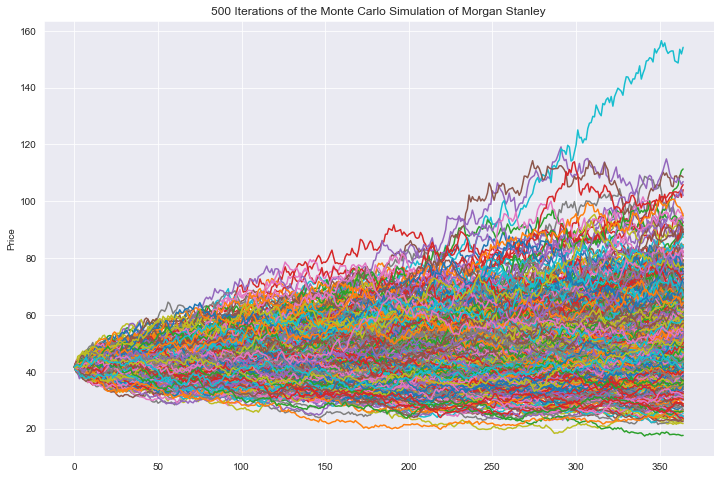

In [242]:
plt.figure(figsize = (12,8))
plt.plot(price_list)
plt.title('{} Iterations of the Monte Carlo Simulation of {}'.format(iterations, fullpackage['Name'][counter]))
plt.ylabel('Price')
plt.show()

In [243]:
print('Min: ',round(price_list[-1].min(),2))
print('Max: ',round(price_list[-1].max(),2))
print('After integrating our monte carlo simulation for',iterations,' iterations, the range that we get for our simulation \
on the final day, day', intervals,' day is $', round(price_list[-1].max() - price_list[-1].min(),2))
print('This is a standard Monte Carlo Simulation that is used to predict stock prices, as you can see there is\
 a significant gap in the range in final price using the Monte Carlo Simulation')

Min:  17.63
Max:  154.2
After integrating our monte carlo simulation for 500  iterations, the range that we get for our simulation on the final day, day 365  day is $ 136.56
This is a standard Monte Carlo Simulation that is used to predict stock prices, as you can see there is a significant gap in the range in final price using the Monte Carlo Simulation


Notice however, that when we run a histogram on the price of the stock for all iterations of the simulation, at any point of our simulation , we notice that the results will always be close to normally distributed, and follow the empirical rule which is implied in Monte Carlo Simulations


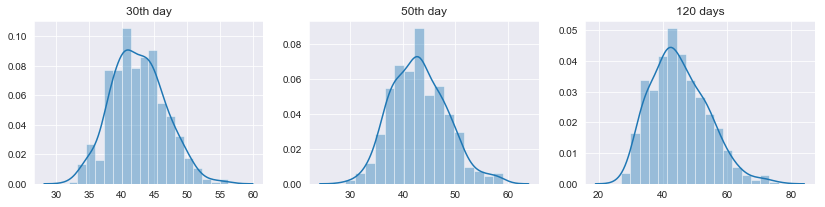

In [244]:
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
sns.distplot(price_list[30])
plt.title('30th day')

plt.subplot(1,3,2)
sns.distplot(price_list[50])
plt.title('50th day')

plt.subplot(1,3,3)
sns.distplot(price_list[120])
plt.title('120 days')

print('Notice however, that when we run a histogram on the price of the stock for all iterations of the simulation, at any point of our simulation ,',
      'we notice that the results will always be close to normally distributed, and follow the empirical rule',
      'which is implied in Monte Carlo Simulations')

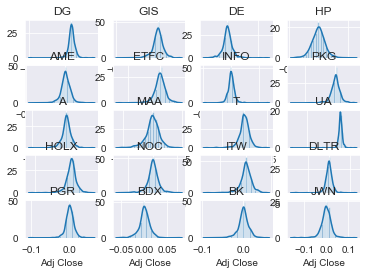

In [253]:
for i, randint in zip(range(1, 21), np.random.randint(5,505,20)):
    plt.subplot(5, 4, i)
    sns.distplot(np.log(1+stockdata[tickers[randint]]['Adj Close'].pct_change().iloc[1:]))
    plt.title(tickers[randint])

Above is 20 randomly selected stocks with a histogram that depicts daily log changes in price over a period of 3 years. As we can see from the charts provided that drastic changes in price in one day is less frequent than minor changes in prices. However some stocks have a KDE distribution that is slightly off center, and a longer tail. What this indicates is that certain stocks have rare the situations where the stock price has jumped in price or fallen in price drastically in one day but these are infrequent events that do not happen with regularity. This shows that stock prices are quite risky and that it will be very difficult to create a model to estimate stock prices due to their volitle nature. 

One thing that almost all the charts have in common is that the price of the stocks are relatively normally distributed over a short period of time. With that assumption made, this version of the Monte Carlo simulation assumes random stochastic variable that has a standard normal distribution to  the uncertain change that happens day to day with the stock market. 

In [254]:
empirical_rule = pd.Series(map(lambda x: np.exp(drift+sigma*(norm.ppf(x))),
                               [1-0.997,1-0.95,1-0.68,0.68,0.95,0.997]))
print(empirical_rule)

0    0.954631
1    0.972794
2    0.992560
3    1.008552
4    1.029045
5    1.048623
dtype: float64


In [255]:
linear_fit = pd.DataFrame(list(map(lambda x:np.linspace(K,K*x,intervals),empirical_rule))).transpose()
linear_fit.columns = [-3,-2,-1,1,2,3]

In [256]:
print(linear_fit.head())
print(linear_fit.tail())

          -3         -2         -1          1          2          3
0  41.740002  41.740002  41.740002  41.740002  41.740002  41.740002
1  41.734800  41.736882  41.739149  41.740983  41.743333  41.745578
2  41.729597  41.733762  41.738296  41.741963  41.746663  41.751153
3  41.724395  41.730643  41.737442  41.742944  41.749994  41.756729
4  41.719192  41.727523  41.736589  41.743925  41.753324  41.762305
            -3         -2         -1          1          2          3
360  39.867116  40.616884  41.432855  42.093052  42.939017  43.747230
361  39.861913  40.613764  41.432001  42.094032  42.942348  43.752805
362  39.856711  40.610644  41.431148  42.095013  42.945678  43.758381
363  39.851508  40.607524  41.430295  42.095994  42.949009  43.763956
364  39.846306  40.604404  41.429442  42.096975  42.952339  43.769532


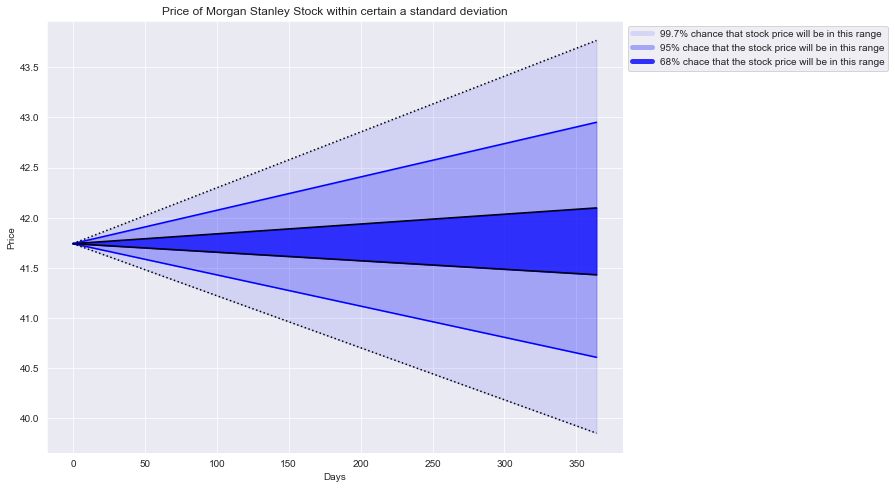

In [257]:
fig1 = plt.figure(figsize  =[8,6])
ax1 = fig1.add_axes([0,0,1,1])

for x in linear_fit.columns:
    if abs(x) == 3:
        ax1.plot(linear_fit[x],color = 'k', linestyle =':', label = '_no_legend_')
    elif abs(x) == 2:
        ax1.plot(linear_fit[x],color = 'b', label = '_no_legend_')
    else:
        ax1.plot(linear_fit[x],color = 'black', label = '_no_legend_')

ax1.fill_between(range(0,intervals), linear_fit[2], linear_fit[3], color = 'blue', alpha = 0.1)
ax1.fill_between(range(0,intervals), linear_fit[-2], linear_fit[-3], color = 'blue', alpha = 0.1)
ax1.fill_between(range(0,intervals), linear_fit[2], linear_fit[1], color='blue', alpha =0.3)
ax1.fill_between(range(0,intervals), linear_fit[-2], linear_fit[-1], color='blue', alpha =0.3)
ax1.fill_between(range(0,intervals), linear_fit[1], linear_fit[-1], color = 'blue', alpha = 0.8)

ax1.plot([],[],linewidth=5, label='99.7% chance that stock price will be in this range', color='blue',alpha=0.1)
ax1.plot([],[],linewidth=5, label='95% chace that the stock price will be in this range', color='blue',alpha=0.3)
ax1.plot([],[],linewidth=5, label='68% chace that the stock price will be in this range', color='blue',alpha=0.8)

ax1.legend(bbox_to_anchor = [1,1])

ax1.set_title('Price of {} Stock within certain a standard deviation'.format(fullpackage.Name[counter]))
ax1.set_xlabel('Days')
ax1.set_ylabel('Price')
plt.show()

This graph displays a band that is representative of where we can reasonably expect the price of a stock to be at after a given period of time. This graph follows the Monte Carlo simulation that was charted above, however replacing the random variable in the equation with a fixed node. This will give an easier to read result than the standard Monte Carlo simulation as well as give a percise range for the stock price estimation. This is also a more efficient model than the original Monte Carlo simulation as we are only required to run the simulation 6 times to create the fixed nodes rather than running the simulation hundreds  of times to come up with a different random path. The band here are created with the empirical rule in mind, where the 3-sigma-rule is used for the bands. This is based on the evidence provided earlier that daily percentage changes in stock prices of a certain period of time are normally distributed.

It is worth noting that based on the Random Walk theory that stock prices are independent from one another, and that historical trends cannot be used to predict the future movement of stock prices. I am not implying that this model is a good representation of the stock future stock prices because of the unpredictable nature of stocks.

In [258]:
#stockdata.to_pickle('STOCKDATA')